In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


TensorFlow version: 2.20.0
Num GPUs Available: 0


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# --- Load Transfermarkt Market Values ---
transfer_file = r"C:\Users\M.ANTONY ROJES\Downloads\Infosys\data\feature_engineered\player_features_model_all_imputed.csv"

try:
    transfer_df = pd.read_csv(transfer_file)
    print("✅ Dataset loaded successfully.")
    print("📁 Columns:", transfer_df.columns.tolist())
    print("🔍 Preview:\n", transfer_df.head())
except FileNotFoundError:
    print(f"❌ File not found: {transfer_file}")
except pd.errors.EmptyDataError:
    print("❌ File is empty.")
except Exception as e:
    print(f"❌ Error loading file: {e}")


✅ Dataset loaded successfully.
📁 Columns: ['player_name', 'date', 'overall_rating', 'potential', 'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'injury_count', 'total_days_out', 'days_per_injury']
🔍 Preview:
       player_name        date  overall_rating  potential attacking_work_rate  \
0     Cesare Bovo  2013-05-03            72.0       73.0              medium   
1        Bas Dost  2014-03-28            76.0       79.0              medium   
2   Denis Tonucci  2015-09-21            67.0       70.0              medium   
3  Enoch Showunmi  2007-

In [6]:
import pandas as pd

# --- Load Transfermarkt Market Values ---
transfer_file = r"C:\Users\M.ANTONY ROJES\Downloads\Infosys\data\feature_engineered\player_features_model_all_imputed.csv"

try:
    transfer_df = pd.read_csv(
        transfer_file,
        sep=",",
        engine="python",
        on_bad_lines="skip"
    )
    print("✅ File loaded successfully.")
    print(f"📐 Shape: {transfer_df.shape}")
    print("📁 Columns:", transfer_df.columns.tolist())
    print("🔍 Preview:\n", transfer_df.head(10))
except FileNotFoundError:
    print(f"❌ File not found: {transfer_file}")
except pd.errors.EmptyDataError:
    print("❌ File is empty.")
except Exception as e:
    print(f"❌ Error loading file: {e}")

✅ File loaded successfully.
📐 Shape: (90177, 41)
📁 Columns: ['player_name', 'date', 'overall_rating', 'potential', 'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'injury_count', 'total_days_out', 'days_per_injury']
🔍 Preview:
       player_name        date  overall_rating  potential attacking_work_rate  \
0     Cesare Bovo  2013-05-03            72.0       73.0              medium   
1        Bas Dost  2014-03-28            76.0       79.0              medium   
2   Denis Tonucci  2015-09-21            67.0       70.0              medium   
3  Eno

In [7]:
print(transfer_df.sample(5))
print(transfer_df.columns)


            player_name        date  overall_rating  potential  \
24736      Dennis Praet  2013-03-15            72.0       86.0   
69171  Charles N'Zogbia  2009-08-30            75.0       83.0   
10654        John Carew  2008-08-30            81.0       87.0   
37550  Hakan Calhanoglu  2016-03-24            79.0       84.0   
61732    Javier Paredes  2012-02-22            68.0       68.0   

      attacking_work_rate defensive_work_rate  crossing  finishing  \
24736              medium              medium      67.0       57.0   
69171              medium                 low      72.0       68.0   
10654              medium              medium      61.0       81.0   
37550              medium              medium      77.0       74.0   
61732              medium              medium      63.0       23.0   

       heading_accuracy  short_passing  ...  standing_tackle  sliding_tackle  \
24736              42.0           75.0  ...             36.0            39.0   
69171              60.

In [8]:
import pandas as pd
import numpy as np
import tensorflow as tf

# Load the consolidated dataset
df = pd.read_csv(r'C:\Users\M.ANTONY ROJES\Downloads\Infosys\data\feature_engineered\player_features_model_all_imputed.csv')

# Display the first few rows and information
print("DataFrame Info:")
df.info()
print("\nFirst 5 rows:")
print(df.head())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90177 entries, 0 to 90176
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_name          90177 non-null  object 
 1   date                 90177 non-null  object 
 2   overall_rating       90177 non-null  float64
 3   potential            90177 non-null  float64
 4   attacking_work_rate  87358 non-null  object 
 5   defensive_work_rate  90177 non-null  object 
 6   crossing             90177 non-null  float64
 7   finishing            90177 non-null  float64
 8   heading_accuracy     90177 non-null  float64
 9   short_passing        90177 non-null  float64
 10  volleys              89256 non-null  float64
 11  dribbling            90177 non-null  float64
 12  curve                89256 non-null  float64
 13  long_passing         90177 non-null  float64
 14  ball_control         90177 non-null  float64
 15  acceleration        

In [9]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# --- Load Dataset ---
file_path = r"C:\Users\M.ANTONY ROJES\Downloads\Infosys\data\feature_engineered\player_features_model_imputed.csv"

try:
    df = pd.read_csv(file_path)
    print("✅ Dataset loaded successfully.")
except Exception as e:
    print(f"❌ Error loading file: {e}")
    exit()

# --- Define Features and Target ---
features = [
    'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
    'dribbling', 'curve', 'long_passing', 'ball_control', 'acceleration',
    'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
    'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
    'interceptions', 'positioning', 'vision', 'penalties', 'marking',
    'standing_tackle', 'sliding_tackle', 'injury_count', 'total_days_out'
]

target = 'overall_rating'  # or 'potential' if you're predicting future performance

# --- Check for Missing Columns ---
missing = [col for col in features + [target] if col not in df.columns]
if missing:
    print(f"❌ Missing columns: {missing}")
    exit()

# --- Scale Features ---
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

print(f"\n✅ Scaled data shape: {scaled_data.shape}")

✅ Dataset loaded successfully.

✅ Scaled data shape: (90177, 29)


In [10]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(data)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = data[i:end_ix, :], data[end_ix, -1] # The last column is the target (market value)
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Define the number of time steps (this is a hyperparameter you can tune)
n_steps = 3

# Create sequences
X, y = create_sequences(scaled_data, n_steps)

print(f"\nShape of X (samples, timesteps, features): {X.shape}")
print(f"Shape of y (samples, output): {y.shape}")


Shape of X (samples, timesteps, features): (90174, 3, 29)
Shape of y (samples, output): (90174,)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define model architecture
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, X.shape[2])))
model.add(Dense(1)) # Output layer for a single value prediction

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

print("\nModel Summary:")
model.summary()

c:\Users\M.ANTONY ROJES\Downloads\Infosys\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        16,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,051 (62.70 KB)

 Trainable params: 16,051 (62.70 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Train the model
# You can split your data into training and validation sets here to monitor loss
# e.g., train on 80% and validate on 20%
split_index = int(0.8 * len(X))
X_train, X_val = X[:split_index], X[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

history = model.fit(
    X_train,
    y_train,
    epochs=50, # You can adjust this
    validation_data=(X_val, y_val),
    verbose=1
)

# You can save the model weights after training
# model.save('lstm_model.h5')

Epoch 1/50
2255/2255 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: nan - val_loss: nan
Epoch 2/50
2255/2255 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: nan - val_loss: nan
Epoch 3/50
2255/2255 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: nan - val_loss: nan
Epoch 4/50
2255/2255 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: nan - val_loss: nan
Epoch 5/50
2255/2255 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: nan - val_loss: nan
Epoch 6/50
2255/2255 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: nan - val_loss: nan
Epoch 7/50
2255/2255 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: nan - val_loss: nan
Epoch 8/50
2255/2255 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: nan - val_loss: nan
Epoch 9/50
2255/2255 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: nan - val_loss: nan
Epoch 10/50
2255/2255 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: nan - val_loss: nan
Epoch 11/50
2255/2255 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: nan - val_loss: nan
Epoch 12/50
2255/2255 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: nan - val_loss: nan
Epoch 13/5

564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
⚠️ NaNs detected in validation data or predictions. Filtering...
❌ No valid samples left after filtering. Cannot compute RMSE.


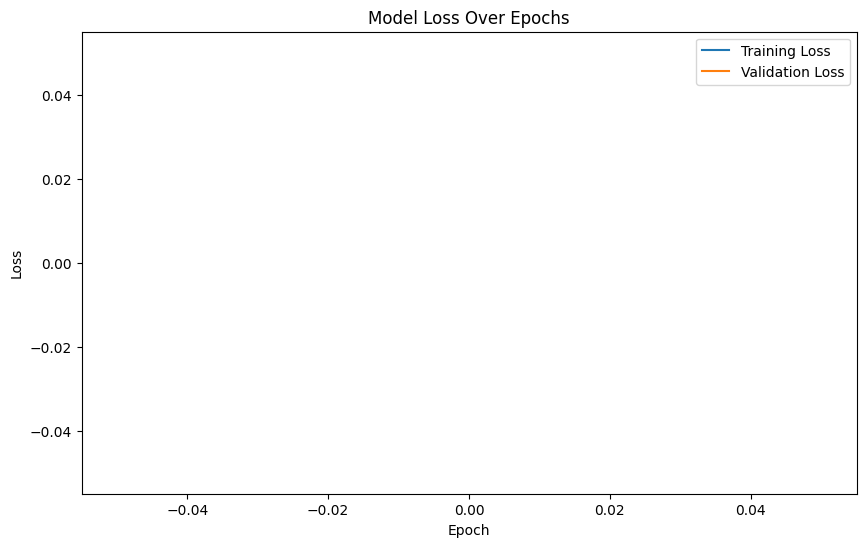

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# --- Plot training and validation loss curves ---
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('model_loss.png')
print("✅ Loss curve saved as 'model_loss.png'")

# --- Make predictions on the validation set ---
y_pred_scaled = model.predict(X_val)

# --- Flatten arrays for comparison ---
y_val_flat = y_val.flatten()
y_pred_flat = y_pred_scaled.flatten()

# --- Check and clean NaNs ---
if np.isnan(y_val_flat).any() or np.isnan(y_pred_flat).any():
    print("⚠️ NaNs detected in validation data or predictions. Filtering...")
    mask = ~np.isnan(y_val_flat) & ~np.isnan(y_pred_flat)
    y_val_clean = y_val_flat[mask]
    y_pred_clean = y_pred_flat[mask]
else:
    y_val_clean = y_val_flat
    y_pred_clean = y_pred_flat

# --- Validate non-empty arrays ---
if len(y_val_clean) == 0 or len(y_pred_clean) == 0:
    print("❌ No valid samples left after filtering. Cannot compute RMSE.")
else:
    rmse = np.sqrt(mean_squared_error(y_val_clean, y_pred_clean))
    print(f"\n✅ Root Mean Squared Error (RMSE) on Validation Set: {rmse:.4f}")

In [17]:
features = ['avg_market_value']
target = 'avg_market_value'


In [18]:
from tensorflow.keras.layers import RepeatVector, TimeDistributed

model_encdec = Sequential([
    LSTM(50, activation='relu', input_shape=(n_steps, X.shape[2])),
    RepeatVector(3),  # predict 3 future steps
    LSTM(50, activation='relu', return_sequences=True),
    TimeDistributed(Dense(1))
])

model_encdec.compile(optimizer='adam', loss='mse')
model_encdec.summary()


c:\Users\M.ANTONY ROJES\Downloads\Infosys\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        16,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 3, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 3, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 3, 1)           │            51 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,251 (141.61 KB)

 Trainable params: 36,251 (141.61 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed

model_encdec = Sequential([
    Input(shape=(n_steps, X.shape[2])),
    LSTM(50, activation='relu'),
    RepeatVector(3),
    LSTM(50, activation='relu', return_sequences=True),
    TimeDistributed(Dense(1))
])


In [ ]:
# --- SAVE WEEK 5 MODELS & RESULTS ---

# Save trained LSTM model
model.save("week_5_lstm_model.h5")
print("✅ LSTM model saved as week_5_lstm_model.h5")

# Save training history (loss curves)
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.to_csv("week_5_training_history.csv", index=False)
print("✅ Training history saved as week_5_training_history.csv")

# Save RMSE result only if it exists
try:
    rmse  # Check if rmse is defined
    with open("week_5_results.txt", "w") as f:
        f.write(f"Week 5 LSTM RMSE (Validation Set): {rmse:.4f}\n")
    print("✅ RMSE saved as week_5_results.txt")
except NameError:
    print("⚠️ RMSE not defined. Skipping save to week_5_results.txt.")

✅ LSTM model saved as week_5_lstm_model.h5
✅ Training history saved as week_5_training_history.csv

